Assignment on Classification technique
Every year many students give the GRE exam to get admission in foreign Universities. The
data set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating
(out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out
of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no,
1=yes). Admitted is the target variable.  
Data Set: https://www.kaggle.com/mohansacharya/graduate-admissions
The counselor of the firm is supposed check whether the student will get an admission or not
based on his/her GRE score and Academic Score. So to help the counselor to take appropriate
decisions build a machine learning model classifier using Decision tree to predict whether a
student will get admission or not.



1.  Apply Data pre-processing (Label Encoding, Data Transformation….)
      techniques if
2.  Perform data-preparation (Train-Test Split)
3.  Apply Machine Learning Algorithm
4.  Evaluate Model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv("Dataset_Admission_Predict.csv")

# Display first few rows
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.drop("Serial No.", axis=1, inplace=True)

In [6]:

print(df.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [7]:
df["Admitted"] = df["Chance of Admit "].apply(lambda x: 1 if x >= 0.75 else 0)

In [8]:
df.drop("Chance of Admit ", axis=1, inplace=True)

In [9]:
scaler = StandardScaler()
features = ["GRE Score", "TOEFL Score", "CGPA"]
df[features] = scaler.fit_transform(df[features])

In [10]:

print(df.head())

   GRE Score  TOEFL Score  University Rating  SOP  LOR       CGPA  Research  \
0   1.762107     1.746971                  4  4.5   4.5  1.764818         1   
1   0.627656    -0.067635                  4  4.0   4.5  0.455151         1   
2  -0.070467    -0.562528                  3  3.0   3.5 -1.005631         1   
3   0.453126     0.427257                  3  3.5   2.5  0.119339         1   
4  -0.244998    -0.727492                  2  2.0   3.0 -0.653029         0   

   Admitted  
0         1  
1         1  
2         0  
3         1  
4         0  


In [11]:
X = df[["GRE Score", "CGPA"]]  # Counselor focuses on GRE and CGPA
y = df["Admitted"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [14]:

y_pred = model.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9250
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        47
           1       0.89      0.94      0.91        33

    accuracy                           0.93        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



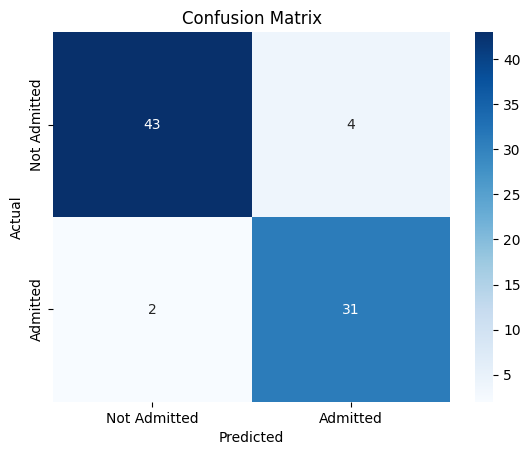

In [17]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Admitted", "Admitted"], yticklabels=["Not Admitted", "Admitted"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

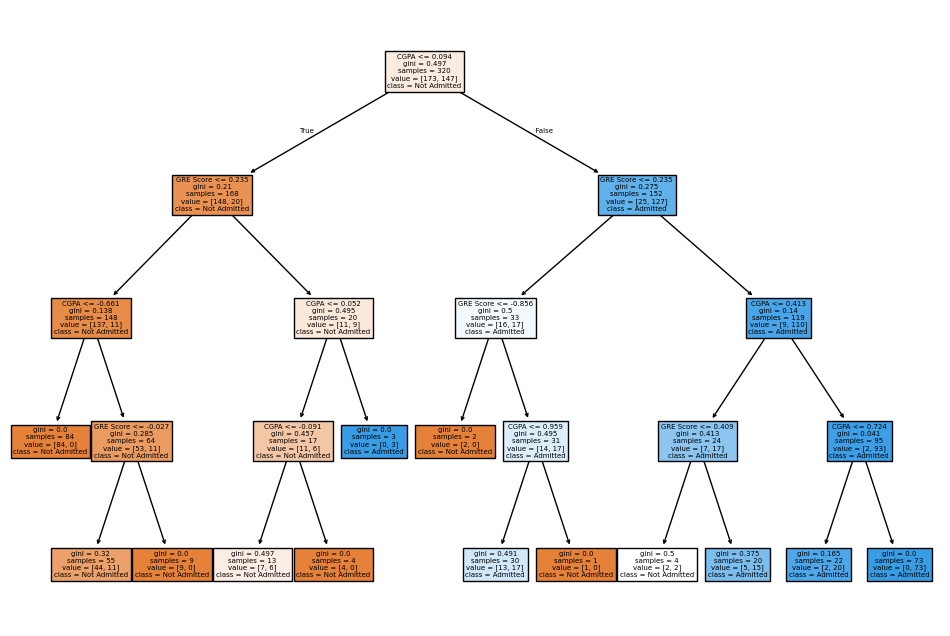

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(model, feature_names=["GRE Score", "CGPA"], class_names=["Not Admitted", "Admitted"], filled=True)
plt.show()